,STE TUN. DU SUCRE,WIFACK INT BANK,ONE TECH HOLDING,PLAC. TSIE-SICAF,ATELIER MEUBLE INT,ATTIJARI LEASING,ARTES,TUNISIE LEASING,HANNIBAL LEASE,SPDIT SICAF
weights,0.100137,0.099422,0.087654,0.072846,0.061381,0.048326,0.039632,0.038723,0.036171,0.034728


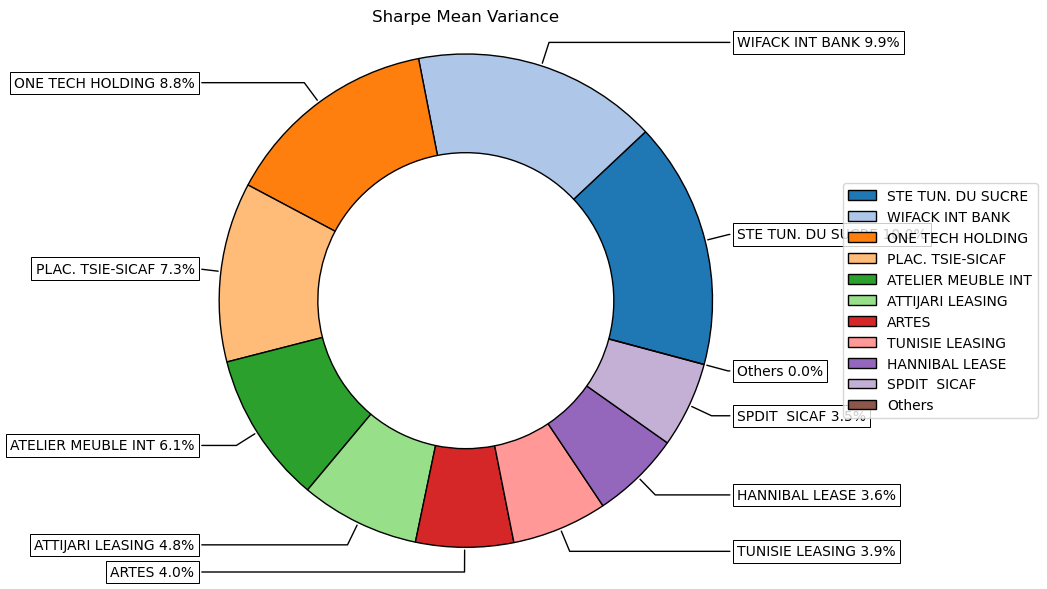

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
adf=pd.read_csv(r"C:\Users\Asus\Downloads\READY.csv")
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame to select data from the last year (2023)
df_2023 = df[df['date'].dt.year == 2023]
asset_names = df_2023['Name'].unique()
assets = df_2023['Name'].unique().tolist()
data = df_2023.pivot_table(index='date', columns='Name', values='close', fill_value=0.0001)
Y = data.pct_change().dropna()
import riskfolio as rp

# Building the portfolio object with returns data
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' 
rm = 'MV' 
obj = 'Sharpe' 
hist = True 
rf = 0 
l = 0 

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Get the risk measure column names
risk_measure_columns = w.columns

# Choose the appropriate risk measure column
selected_risk_measure = risk_measure_columns[0]  
# Select the top 10 companies based on their weights
top_10_companies = w.nlargest(10, selected_risk_measure).index

# Filter the portfolio weights to keep only the top 10 companies
w_top_10 = w.loc[top_10_companies]

# Display the optimal portfolio weights for the top 10 companies
display(w_top_10.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_top_10, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")

# Load the CSV file
adf = pd.read_csv(r"C:\Users\Asus\Downloads\READY.csv")

# Convert 'date' column to datetime format
adf['date'] = pd.to_datetime(adf['date'])

# Filter the DataFrame to select data from the last year (2023)
df_2023 = adf[adf['date'].dt.year == 2023]
asset_names = df_2023['Name'].unique()
assets = df_2023['Name'].unique().tolist()

# Pivot the data to get closing prices
data = df_2023.pivot_table(index='date', columns='Name', values='close', fill_value=0.0001)

# Calculate percentage changes to get returns and drop NA values
Y = data.pct_change().dropna()

# List of specific companies
companies = ["AMEN BANK", "ATL", "ATTIJARI LEASING", "BIAT", "BNA", "BT", "CITY CARS", "ENNAKL AUTOMOBILES"]

# Filter Y to include only the specified companies
Y_filtered = Y[companies]

# Get the latest 7 rows of the filtered returns data
Y_latest_7_rows = Y_filtered.tail(7)

# Display the latest 7 rows of returns for the specified companies
print(Y_latest_7_rows)

# If you want to save it to a CSV file
Y_latest_7_rows.to_csv(r"C:\Users\Asus\Downloads\latest_7_rows_returns.csv")


Name        AMEN BANK       ATL  ATTIJARI LEASING      BIAT       BNA  \
date                                                                    
2023-12-21   0.000000 -0.005525          0.003003 -0.001974 -0.006098   
2023-12-22  -0.002994  0.000000         -0.011976 -0.001099 -0.006135   
2023-12-25  -0.000601  0.000000          0.011515  0.000000  0.004938   
2023-12-26   0.000601  0.000000          0.041342  0.001100 -0.004914   
2023-12-27   0.006006  0.000000          0.000000 -0.000549  0.000000   
2023-12-28   0.014925  0.000000         -0.020138  0.011545  0.004938   
2023-12-29  -0.014706  0.000000         -0.013506 -0.001087 -0.001229   

Name              BT  CITY CARS  ENNAKL AUTOMOBILES  
date                                                 
2023-12-21  0.000000   0.000000            0.000000  
2023-12-22  0.001887   0.001657            0.003344  
2023-12-25  0.000000  -0.000827            0.000000  
2023-12-26  0.000000  -0.014901            0.000000  
2023-12-27  0.0000